In [1]:
import pickle

In [2]:
x_poison = pickle.load(open('x_poison.sav', 'rb'))
y_poison = pickle.load(open('y_poison.sav', 'rb'))

In [3]:
x_poison.head()

,loan_amnt,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,open_acc,pub_rec_1,revol_bal,revol_util,...,emp_length,earliest_cr_line,mths_since_last_delinq,mths_since_last_record,mths_since_last_major_derog,term_36months,addr_state,purpose,home_ownership,verification_status
0,0.617527,0.076650,0.319744,0.00,0.183657,0.000,0.053429,0.0,0.007540,0.023138,...,0.929040,1.096762,0.391101,1.0,1.000000,0.0,11.0,13.0,4.0,1.0
6,0.840441,0.083221,0.934623,0.05,0.000000,0.002,0.197972,0.0,0.006988,0.011173,...,0.992583,1.065370,0.304383,1.0,1.000000,1.0,38.0,1.0,4.0,1.0
7,0.601370,0.076575,0.918743,0.00,0.000000,0.000,0.049780,0.0,0.005827,0.061177,...,0.323375,0.354150,1.000000,1.0,1.000000,0.0,35.0,5.0,4.0,1.0
8,0.042075,0.038691,0.262630,0.00,0.000000,0.000,0.025325,0.0,0.003398,0.093639,...,1.000000,0.766989,0.182065,1.0,1.000000,1.0,6.0,1.0,2.0,1.0
20,0.532681,0.002827,0.261607,0.00,0.143597,0.000,0.193205,0.0,0.000176,0.190190,...,1.000000,0.713406,0.021816,1.0,0.061118,1.0,12.0,13.0,2.0,1.0


In [4]:
y_poison.head()

,0
0,0.7
1,-0.2
2,-0.2
3,-0.2
4,0.7


In [5]:
print(x_poison.shape, y_poison.shape)

(20500, 23) (20500, 1)


In [6]:
x_clean = pickle.load(open('X_preprocessed.sav', 'rb'))
y_clean = pickle.load(open('Y_preprocessed.sav', 'rb'))

In [7]:
print(x_clean.shape, y_clean.shape)

(168048, 23) (168048, 1)


In [8]:
import pandas as pd

In [9]:
df_chunks = []

In [10]:
i = 0
for _ in range(20):
    if i+1000 < len(x_poison):
        df_chunks.append(x_poison.iloc[i:i + 1000, :])
    else:
        df_chunks.append(x_poison.iloc[i:, :])
    i = i + 1000

In [11]:
count = 0
for chunk in df_chunks:
    count += 1
    print(chunk)
print(count)

      loan_amnt  annual_inc       dti  delinq_2yrs  inq_last_6mths  pub_rec  \
0      0.617527    0.076650  0.319744         0.00        0.183657    0.000   
6      0.840441    0.083221  0.934623         0.05        0.000000    0.002   
7      0.601370    0.076575  0.918743         0.00        0.000000    0.000   
8      0.042075    0.038691  0.262630         0.00        0.000000    0.000   
20     0.532681    0.002827  0.261607         0.00        0.143597    0.000   
...         ...         ...       ...          ...             ...      ...   
2462   0.363911    0.085638  0.748099         0.00        0.000000    0.000   
2464   0.247667    0.070684  0.729780         0.00        0.000000    0.002   
2465   0.609825    0.014510  0.779747         0.00        0.136198    0.000   
2466   0.749181    0.027913  0.717478         0.00        0.000000    0.000   
2469   0.235665    0.029103  0.240281         0.05        0.120392    0.000   

      open_acc  pub_rec_1  revol_bal  revol_util  .

       loan_amnt  annual_inc       dti  delinq_2yrs  inq_last_6mths  pub_rec  \
31635   0.248692    0.096058  0.571016         0.05        0.000000    0.000   
31642   0.282745    0.054925  0.156259         0.00        0.067213    0.000   
31645   0.093015    0.033323  0.454104         0.00        0.192303    0.000   
31647   0.526960    0.091741  0.007140         0.00        0.132335    0.000   
31651   0.243116    0.067416  0.407529         0.00        0.000000    0.000   
...          ...         ...       ...          ...             ...      ...   
34085   0.689293    0.067828  0.449035         0.05        0.000000    0.000   
34086   0.015900    0.090536  0.705341         0.00        0.000000    0.002   
34089   0.486382    0.077133  0.689614         0.05        0.000000    0.000   
34094   0.983714    0.061632  0.642916         0.05        0.000000    0.000   
34095   0.287306    0.030917  0.009644         0.05        0.033850    0.000   

       open_acc  pub_rec_1  revol_bal  

In [12]:
y_chunks = []
i = 0
for _ in range(20):
    if i+1000 < len(y_poison):
        y_chunks.append(y_poison.iloc[i:i + 1000, :])
    else:
        y_chunks.append(y_poison.iloc[i:, :])
    i = i + 1000

In [13]:
count = 0
for chunk in y_chunks:
    count += 1
    print(chunk)
print(count)

       0
0    0.7
1   -0.2
2   -0.2
3   -0.2
4    0.7
..   ...
995 -0.2
996 -0.2
997  0.7
998 -0.2
999  0.7

[1000 rows x 1 columns]
        0
1000 -0.2
1001 -0.2
1002 -0.2
1003  0.7
1004  0.7
...   ...
1995 -0.2
1996 -0.2
1997  0.7
1998 -0.2
1999 -0.2

[1000 rows x 1 columns]
        0
2000 -0.2
2001 -0.2
2002 -0.2
2003 -0.2
2004 -0.2
...   ...
2995  0.7
2996 -0.2
2997 -0.2
2998  0.7
2999 -0.2

[1000 rows x 1 columns]
        0
3000 -0.2
3001 -0.2
3002 -0.2
3003 -0.2
3004 -0.2
...   ...
3995  0.7
3996 -0.2
3997 -0.2
3998 -0.2
3999  0.7

[1000 rows x 1 columns]
        0
4000 -0.2
4001 -0.2
4002  0.7
4003  0.7
4004 -0.2
...   ...
4995 -0.2
4996 -0.2
4997 -0.2
4998 -0.2
4999  0.7

[1000 rows x 1 columns]
        0
5000 -0.2
5001 -0.2
5002 -0.2
5003  0.7
5004 -0.2
...   ...
5995  0.7
5996  0.7
5997 -0.2
5998 -0.2
5999 -0.2

[1000 rows x 1 columns]
        0
6000 -0.2
6001  0.7
6002 -0.2
6003 -0.2
6004  0.7
...   ...
6995 -0.2
6996  0.7
6997  0.7
6998 -0.2
6999 -0.2

[1000 rows x 1 column

In [14]:
filename = 'original_model.sav'
clean_model = pickle.load(open(filename, 'rb'))

In [15]:
x_clean = pickle.load(open('X_preprocessed.sav', 'rb'))
y_clean = pickle.load(open('Y_preprocessed.sav', 'rb'))

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
print(x_clean.shape, y_clean.shape)

(168048, 23) (168048, 1)


In [19]:
x_new = x_clean
y_new = y_clean

In [20]:
rmse_array = []

In [21]:
for _ in range(5):

    least_error_df = pd.DataFrame()
    min_error = 10000000
    least_error_index = 10000000
    
    for index, chunk in enumerate(df_chunks):
        #print("At index:", index)
        y_pred = clean_model.predict(chunk)
        rmse = mean_squared_error(y_chunks[index], y_pred)
        #print("rmse of current chunk: ", rmse)
        if(rmse < min_error):
            min_error = rmse
            least_error_df = chunk
            least_error_index = index
            #print("Min error is now: ", min_error)

    
    least_error_df = pd.DataFrame(least_error_df.iloc[:,:].values)    
    x_new = x_new.append(least_error_df)
    y_new = y_new.append(y_chunks[least_error_index])

    del df_chunks[least_error_index]
    del y_chunks[least_error_index]
    
    print(x_new.shape, y_new.shape)

    X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.3, random_state=0)
    regressor = LinearRegression()  
    LIR=regressor.fit(X_train, y_train) 
    y_clean_pred = LIR.predict(x_clean)

    from sklearn.metrics import mean_squared_error
    rmse = mean_squared_error(y_clean, y_clean_pred)
    rmse_array.append(rmse)
    print(rmse)


(169048, 23) (169048, 1)
0.021338170472431434
(170048, 23) (170048, 1)
0.02142391745534444
(171048, 23) (171048, 1)
0.021553703308721497
(172048, 23) (172048, 1)
0.02158127416574813
(173048, 23) (173048, 1)
0.021610630204260805


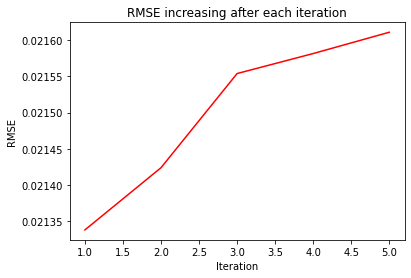

In [22]:
import numpy as np  
import matplotlib.pyplot as plt  
  
# data to be plotted 
x = [1,2,3,4,5]
y = rmse_array
  
# plotting 
plt.title("RMSE increasing after each iteration")  
plt.xlabel("Iteration")  
plt.ylabel("RMSE")  
plt.plot(x, y, color ="red")  
plt.show()

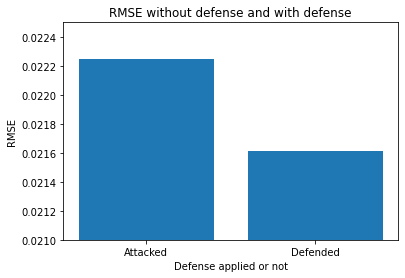

In [23]:
rmse_poisoned = pickle.load(open('rmse_poison.sav', 'rb'))
rmse_defended = rmse_array[-1]

x = ['Attacked', 'Defended']
y = [rmse_poisoned, rmse_defended]
  
# plotting 
plt.title("RMSE without defense and with defense")  
plt.xlabel("Defense applied or not")  
plt.ylabel("RMSE")  
plt.ylim([0.021, 0.0225])
plt.bar(x, y)  
plt.show()

In [24]:
print(x_new.shape, y_new.shape)

(173048, 23) (173048, 1)


In [25]:
print(len(df_chunks), len(y_chunks))

15 15


In [26]:
rmse_clean = pickle.load(open('rmse_clean.sav', 'rb'))

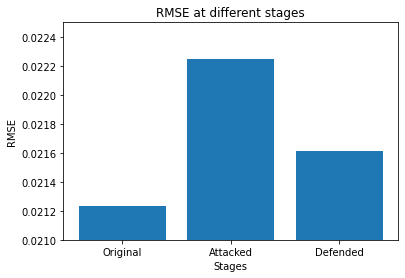

In [27]:
x = ['Original', 'Attacked', 'Defended']
y = [rmse_clean, rmse_poisoned, rmse_defended]
  
# plotting 
plt.title("RMSE at different stages")  
plt.xlabel("Stages")  
plt.ylabel("RMSE")  
plt.ylim([0.021, 0.0225])
plt.bar(x, y)  
plt.show()